In [1]:
!{sys.executable} -m pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy import stats

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïúÍµ≠Ïñ¥ ÌôòÍ≤ΩÏö©)
plt.rcParams['font.family'] = 'Nanumgothic'
plt.rcParams['axes.unicode_minus'] = False

zsh:1: parse error near `-m'


In [2]:
# Ï†ÑÏ≤¥ ÏúÑÏÉùÎç∞Ïù¥ÌÑ∞ Ï§ë Ïπ¥ÌéòÎßå Ï∂îÏ∂ú
df_clean = pd.read_csv("/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/·Ñã·Ö±·Ñâ·Ö¢·Üº·ÑÉ·Ö≥·Üº·ÑÄ·Ö≥·Ü∏.csv", index_col=0)

def analyze_hygiene_by_brand(df, brands):
    result = {}
    for brand in brands:
        brand_df = df_clean[df_clean['ÏóÖÏÜåÎ™Ö'].str.contains(brand, na=False)]
        grade_counts = brand_df['ÏßÄÏ†ïÎì±Í∏â'].value_counts()
        result[brand] = grade_counts.to_dict()
    result_df = pd.DataFrame(result).fillna(0).astype(int).T
    return result_df

brands = ["Î©îÍ∞Ä", "Ïª¥Ìè¨Ï¶à", "Ïù¥ÎîîÏïº", "Ìà¨Ïç∏", "Ìï†Î¶¨Ïä§"]

result_df = analyze_hygiene_by_brand(df_clean, brands)

result_df = result_df.reset_index()
result_df = result_df.rename(columns={'index': 'Î∏åÎûúÎìúÎ™Ö',    
    'Îß§Ïö∞Ïö∞Ïàò': 'ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò',
    'Ïö∞Ïàò': 'ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò',
    'Ï¢ãÏùå': 'ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò',
})
result_df['Î∏åÎûúÎìúÎ™Ö'] = result_df['Î∏åÎûúÎìúÎ™Ö'].replace({'Î©îÍ∞Ä': 'Î©îÍ∞ÄÏª§Ìîº', 'Ìà¨Ïç∏': 'Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§'})
result_df['ÏúÑÏÉùÎì±Í∏âÏ¥ùÍ∞úÏàò'] = result_df[['ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò', 'ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò', 'ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò']].sum(axis=1)

print(result_df)

     Î∏åÎûúÎìúÎ™Ö  ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¥ùÍ∞úÏàò
0    Î©îÍ∞ÄÏª§Ìîº          82        13         2       97
1     Ïª¥Ìè¨Ï¶à         136        20         1      157
2     Ïù¥ÎîîÏïº        1716       145        26     1887
3  Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§         862        12         2      876
4     Ìï†Î¶¨Ïä§         318         3         1      322


In [3]:
# ÌÜµÌï© Îç∞Ïù¥ÌÑ∞
file_path = r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•.csv"

df = pd.read_csv(file_path)

# ÏΩ§Îßà Ï†úÍ±∞ Î∞è ÏàòÏπò Î≥ÄÌôò
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

# Îã®ÏúÑ Î≥ÄÌôò (Î∞±ÎßåÏõê Îã®ÏúÑÎ°ú ÌÜµÏùº)
money_cols = ['ÌèâÍ∑†Îß§Ï∂úÏï°(Ïõê)', 'Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Ïõê)', 'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Ïõê)', 'Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Ïõê)']
for col in money_cols:
    df[col]=df[col] / 1_000_000

# ÌåîÎ°úÏõå=ÎßåÎ™Ö Îã®ÏúÑÎ°ú Î≥ÄÌôò
df['ÌåîÎ°úÏõå(Î™Ö)'] = df['ÌåîÎ°úÏõå(Î™Ö)'] / 10_000

# Ïª¨ÎüºÎ™Ö Î≥ÄÌôò
df.rename(columns={
    'Unnamed: 0' :'Î∏åÎûúÎìúÎ™Ö',
    'ÌèâÍ∑†Îß§Ï∂úÏï°(Ïõê)': 'ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)',
    'Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Ïõê)': 'Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)',
    'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Ïõê)': 'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)',
    'Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Ïõê)': 'Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)',
    'ÌåîÎ°úÏõå(Î™Ö)': 'ÌåîÎ°úÏõå(ÎßåÎ™Ö)'
}, inplace=True)

df['Î∏åÎûúÎìúÎ™Ö'] = df['Î∏åÎûúÎìúÎ™Ö'].replace({'Î©îÍ∞Ä': 'Î©îÍ∞ÄÏª§Ìîº', 'Ìà¨Ïç∏': 'Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§'})

print(df.head())

     Î∏åÎûúÎìúÎ™Ö    Í∞ÄÎßπÏ†êÏàò  ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)  \
0    Î©îÍ∞ÄÏª§Ìîº  2681.0     362.621         20.908       74.226           1.540   
1     Ïª¥Ìè¨Ï¶à  2360.0     265.013         26.002       95.232           1.600   
2     Ïù¥ÎîîÏïº  2805.0     195.287          6.447      127.890           2.090   
3  Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§  1484.0     522.117          8.949      309.800           2.187   
4     Ìï†Î¶¨Ïä§   424.0     344.268          5.849      261.000           2.000   

   ÌåîÎ°úÏõå(ÎßåÎ™Ö)  
0      4.7  
1     12.3  
2     21.4  
3     32.7  
4      6.5  


In [4]:
# ÏúÑÏÉù Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df = pd.merge(df, result_df, on='Î∏åÎûúÎìúÎ™Ö', how='left')
print(df)

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(f"\nÍ≤∞Ï∏°Ïπò Ï¥ù Í∞úÏàò: {df.isnull().sum().sum()}")

print("\nÍ∏∞Ïà† ÌÜµÍ≥ÑÎüâ:")
df.describe().round(1).T

     Î∏åÎûúÎìúÎ™Ö    Í∞ÄÎßπÏ†êÏàò  ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)  \
0    Î©îÍ∞ÄÏª§Ìîº  2681.0     362.621         20.908       74.226           1.540   
1     Ïª¥Ìè¨Ï¶à  2360.0     265.013         26.002       95.232           1.600   
2     Ïù¥ÎîîÏïº  2805.0     195.287          6.447      127.890           2.090   
3  Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§  1484.0     522.117          8.949      309.800           2.187   
4     Ìï†Î¶¨Ïä§   424.0     344.268          5.849      261.000           2.000   

   ÌåîÎ°úÏõå(ÎßåÎ™Ö)  ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¥ùÍ∞úÏàò  
0      4.7          82        13         2       97  
1     12.3         136        20         1      157  
2     21.4        1716       145        26     1887  
3     32.7         862        12         2      876  
4      6.5         318         3         1      322  

Í≤

count    mean    std    min     25%     50%     75%     max
Í∞ÄÎßπÏ†êÏàò              5.0  1950.8  997.4  424.0  1484.0  2360.0  2681.0  2805.0
ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)        5.0   337.9  122.7  195.3   265.0   344.3   362.6   522.1
Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)     5.0    13.6    9.2    5.8     6.4     8.9    20.9    26.0
ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)       5.0   173.6  105.2   74.2    95.2   127.9   261.0   309.8
Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)    5.0     1.9    0.3    1.5     1.6     2.0     2.1     2.2
ÌåîÎ°úÏõå(ÎßåÎ™Ö)           5.0    15.5   11.6    4.7     6.5    12.3    21.4    32.7
ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò        5.0   622.8  684.6   82.0   136.0   318.0   862.0  1716.0
ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò          5.0    38.6   59.8    3.0    12.0    13.0    20.0   145.0
ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò          5.0     6.4   11.0    1.0     1.0     2.0     2.0    26.0
ÏúÑÏÉùÎì±Í∏âÏ¥ùÍ∞úÏàò           5.0   667.8  747.7   97.0   157.0   322.0   876.0  1887.0

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏòàÏãú (Îß• Ïö©)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf" 

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

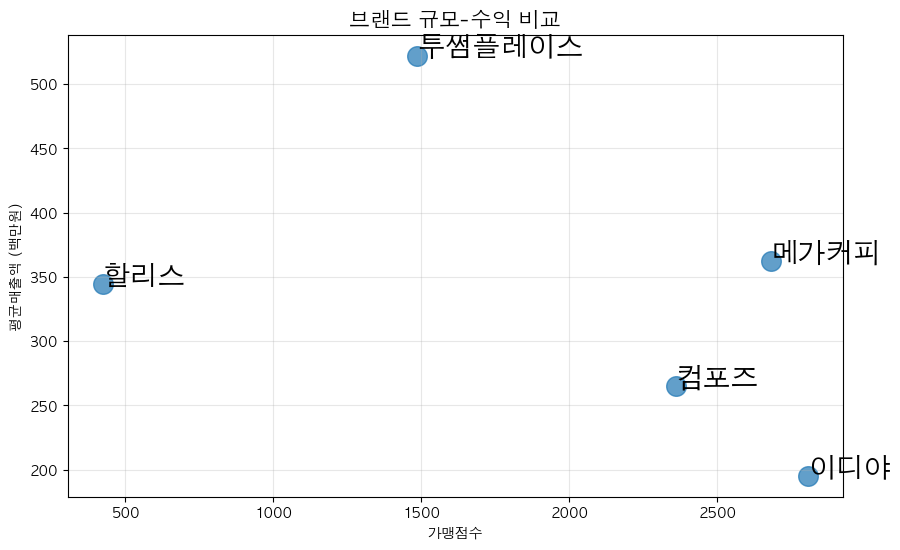

In [16]:
# Î∏åÎûúÎìúÎ≥Ñ Í∞ÄÎßπÏ†êÏàò & ÌèâÍ∑†Îß§Ï∂úÏï° ÎπÑÍµê ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['Í∞ÄÎßπÏ†êÏàò'], df['ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)'], s=200, alpha=0.7)

for i in range(len(df)):
    x = df.loc[i, 'Í∞ÄÎßπÏ†êÏàò']
    y = df.loc[i, 'ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)']
    label = df.loc[i, 'Î∏åÎûúÎìúÎ™Ö']
    plt.text(x, y, label, fontsize=20)

plt.title("Î∏åÎûúÎìú Í∑úÎ™®-ÏàòÏùµ ÎπÑÍµê", fontsize=15)
plt.xlabel("Í∞ÄÎßπÏ†êÏàò")
plt.ylabel("ÌèâÍ∑†Îß§Ï∂úÏï° (Î∞±ÎßåÏõê)")
plt.grid(True, alpha=0.3)
plt.show()

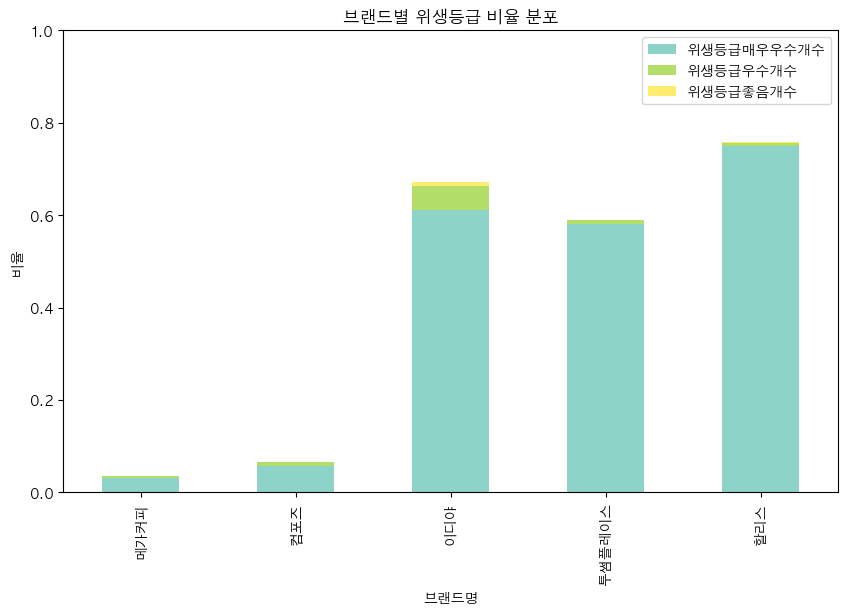

In [7]:
# ÏúÑÏÉùÎì±Í∏â Í∞úÏàòÎ•º Í∞ÄÎßπÏ†ê ÏàòÎ°ú ÎÇòÎàà ÎπÑÏú® Í≥ÑÏÇ∞
df_ratio = df.set_index('Î∏åÎûúÎìúÎ™Ö')[['ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò','ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò','ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò']].div(df.set_index('Î∏åÎûúÎìúÎ™Ö')['Í∞ÄÎßπÏ†êÏàò'], axis=0)

# ÎπÑÏú® Ïä§ÌÉù Î∞î Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
df_ratio.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title("Î∏åÎûúÎìúÎ≥Ñ ÏúÑÏÉùÎì±Í∏â ÎπÑÏú® Î∂ÑÌè¨")
plt.ylabel("ÎπÑÏú®")
plt.ylim(0, 1)  # ÎπÑÏú®Ïù¥ÎãàÍπå 0~1 ÏÇ¨Ïù¥
plt.show()


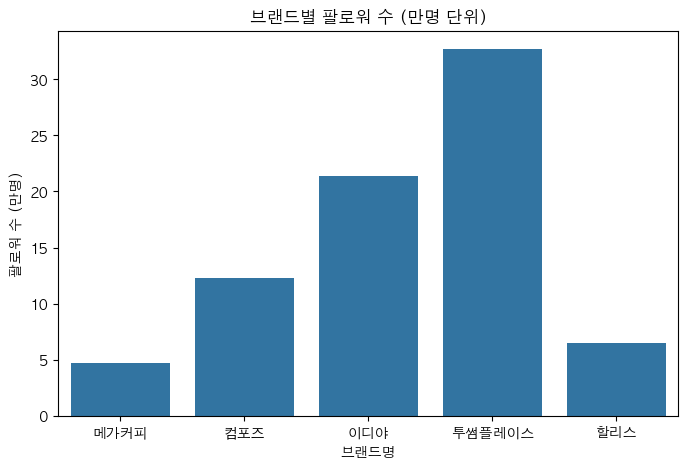

In [8]:
# Î∏åÎûúÎìú ÌååÏõå ÏßÄÌëú (ÌåîÎ°úÏõå) 
import seaborn as sns

# ÌåîÎ°úÏõå Ïàò ÎπÑÍµê
plt.figure(figsize=(8,5))
sns.barplot(x='Î∏åÎûúÎìúÎ™Ö', y='ÌåîÎ°úÏõå(ÎßåÎ™Ö)', data=df)
plt.title("Î∏åÎûúÎìúÎ≥Ñ ÌåîÎ°úÏõå Ïàò (ÎßåÎ™Ö Îã®ÏúÑ)")
plt.ylabel("ÌåîÎ°úÏõå Ïàò (ÎßåÎ™Ö)")
plt.show()

In [9]:
# ÏßÄÏó≠Î≥Ñ Ïπ¥Ìéò Î∂ÑÌè¨
file_path = r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/·ÑÜ·Ö¢·Ñå·Ö°·Üº·Ñá·ÖÆ·Ü´·Ñë·Ö©.csv"

df_korea = pd.read_csv(file_path, index_col=0)
df_korea = df_korea.T
df_korea.head()

ÏÑúÏö∏   Î∂ÄÏÇ∞   ÎåÄÍµ¨   Ïù∏Ï≤ú   Í¥ëÏ£º  ÎåÄÏ†Ñ  Ïö∏ÏÇ∞  ÏÑ∏Ï¢Ö   Í≤ΩÍ∏∞   Í∞ïÏõê  Ï∂©Î∂Å  Ï∂©ÎÇ®   Ï†ÑÎ∂Å  Ï†ÑÎÇ®   Í≤ΩÎ∂Å  \
Î©îÍ∞ÄÏª§Ìîº    639   92   41  245  115  67  11  16  893   85  82  87   57  88   55   
Ïª¥Ìè¨Ï¶à     410  266   48  218  140  39  44   5  595   75  32  54   31  57   73   
Ïù¥ÎîîÏïº     592  150  105  176   74  59  92  20  726  139  99  97  102  88  129   
Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§  277   77   96   98   48  65  33  15  366   60  51  58   43  46   65   
Ìï†Î¶¨Ïä§      88   22   20   16   12  17  12   4  100   15  17  21   31  12   14   

         Í≤ΩÎÇ®  Ï†úÏ£º  
Î©îÍ∞ÄÏª§Ìîº     70  38  
Ïª¥Ìè¨Ï¶à     239  35  
Ïù¥ÎîîÏïº     138  19  
Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§   65  21  
Ìï†Î¶¨Ïä§      20   3

<Figure size 1500x800 with 0 Axes>

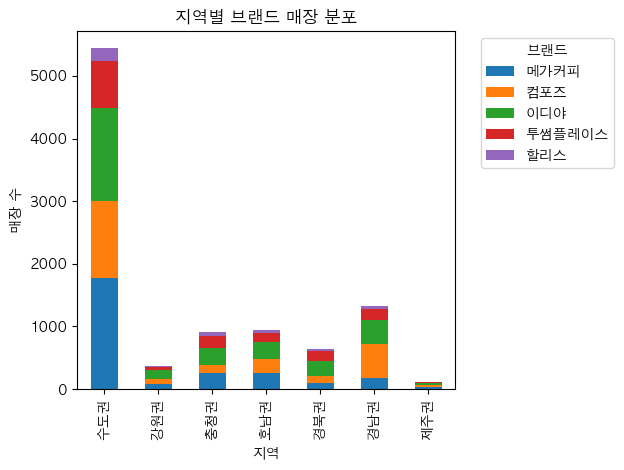

In [10]:
regions = {
    'ÏàòÎèÑÍ∂å': ['ÏÑúÏö∏', 'Í≤ΩÍ∏∞', 'Ïù∏Ï≤ú'],
    'Í∞ïÏõêÍ∂å': ['Í∞ïÏõê'],
    'Ï∂©Ï≤≠Í∂å': ['ÎåÄÏ†Ñ', 'Ï∂©Î∂Å', 'Ï∂©ÎÇ®', 'ÏÑ∏Ï¢Ö'],
    'Ìò∏ÎÇ®Í∂å': ['Í¥ëÏ£º', 'Ï†ÑÎ∂Å', 'Ï†ÑÎÇ®'],
    'Í≤ΩÎ∂ÅÍ∂å': ['ÎåÄÍµ¨', 'Í≤ΩÎ∂Å'],
    'Í≤ΩÎÇ®Í∂å': ['Î∂ÄÏÇ∞', 'Ïö∏ÏÇ∞', 'Í≤ΩÎÇ®'],
    'Ï†úÏ£ºÍ∂å': ['Ï†úÏ£º']
}

# Í∂åÏó≠Î≥Ñ Ìï©ÏπòÍ∏∞
for region, columns in regions.items():
    df_korea[region] = df_korea[columns].sum(axis=1)

# Í∏∞Ï°¥ ÏßÄÏó≠ Ïª¨ÎüºÏùÄ ÌïÑÏöî ÏóÜÏúºÎ©¥ ÏÇ≠Ï†ú
remove_columns = sum(regions.values(), [])
df_korea = df_korea.drop(columns=remove_columns)

plt.figure(figsize=(15,8))
df_korea.T.plot(kind='bar', stacked=True)
plt.title('ÏßÄÏó≠Î≥Ñ Î∏åÎûúÎìú Îß§Ïû• Î∂ÑÌè¨')
plt.xlabel('ÏßÄÏó≠')
plt.ylabel('Îß§Ïû• Ïàò')
plt.legend(title='Î∏åÎûúÎìú', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# ÏàòÏùµÏÑ± Î∂ÑÏÑùÏö© Ï£ºÏöî ÏßÄÌëú Ï∂îÏ∂ú
profit_df = df[['Î∏åÎûúÎìúÎ™Ö', 'ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', 'Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', 'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)']].copy()

print("===== ÏàòÏùµÏÑ± Í¥ÄÎ†® ÏöîÏïΩ ÌÜµÍ≥Ñ =====")
display(profit_df.describe().round(2))

print("===== Î∏åÎûúÎìúÎ≥Ñ ÏàòÏùµÏÑ± ÎπÑÍµê =====")
display(profit_df.sort_values(by='ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', ascending=False))

===== ÏàòÏùµÏÑ± Í¥ÄÎ†® ÏöîÏïΩ ÌÜµÍ≥Ñ =====


ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)
count        5.00           5.00         5.00
mean       337.86          13.63       173.63
std        122.72           9.22       105.23
min        195.29           5.85        74.23
25%        265.01           6.45        95.23
50%        344.27           8.95       127.89
75%        362.62          20.91       261.00
max        522.12          26.00       309.80

===== Î∏åÎûúÎìúÎ≥Ñ ÏàòÏùµÏÑ± ÎπÑÍµê =====


Î∏åÎûúÎìúÎ™Ö  ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)
3  Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§     522.117          8.949      309.800
0    Î©îÍ∞ÄÏª§Ìîº     362.621         20.908       74.226
4     Ìï†Î¶¨Ïä§     344.268          5.849      261.000
1     Ïª¥Ìè¨Ï¶à     265.013         26.002       95.232
2     Ïù¥ÎîîÏïº     195.287          6.447      127.890

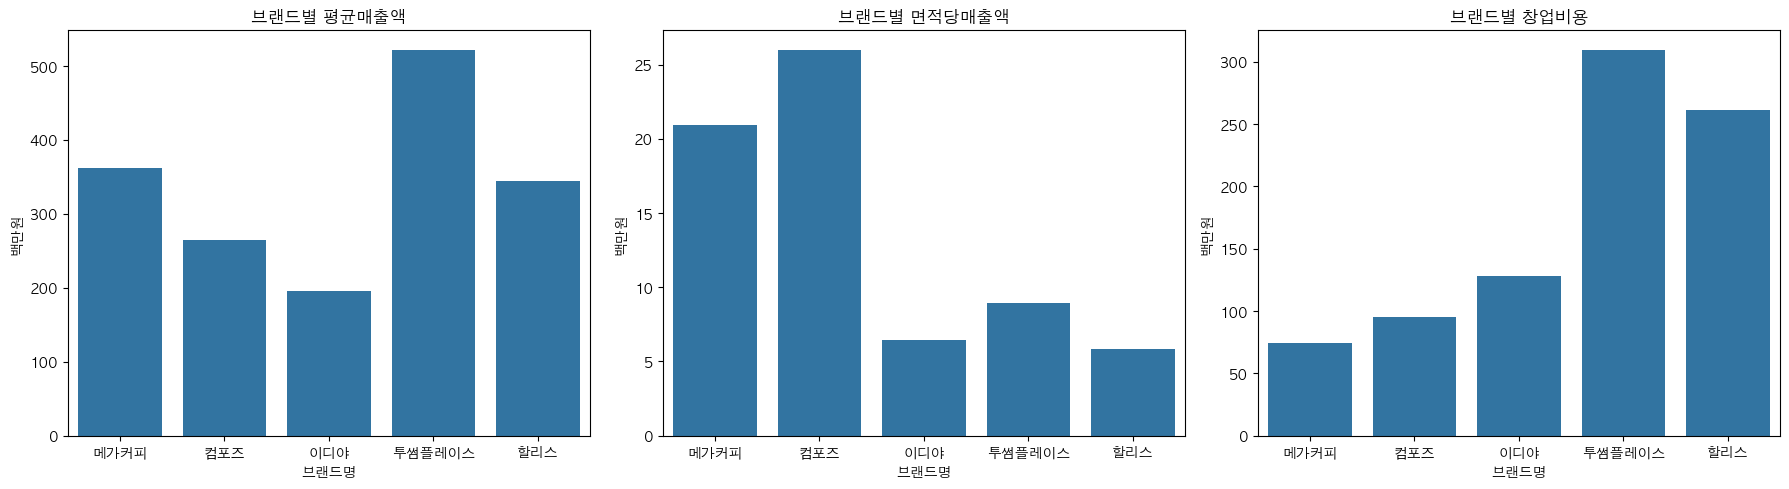

In [12]:
# Ìïú ÌôîÎ©¥Ïóê ÏàòÏùµÏÑ± ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ÌèâÍ∑†Îß§Ï∂ú
sns.barplot(data=profit_df, x='Î∏åÎûúÎìúÎ™Ö', y='ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', ax=axs[0])
axs[0].set_title('Î∏åÎûúÎìúÎ≥Ñ ÌèâÍ∑†Îß§Ï∂úÏï°')
axs[0].set_ylabel('Î∞±ÎßåÏõê')

# Î©¥Ï†ÅÎãπÎß§Ï∂ú
sns.barplot(data=profit_df, x='Î∏åÎûúÎìúÎ™Ö', y='Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', ax=axs[1])
axs[1].set_title('Î∏åÎûúÎìúÎ≥Ñ Î©¥Ï†ÅÎãπÎß§Ï∂úÏï°')
axs[1].set_ylabel('Î∞±ÎßåÏõê')

# ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à
sns.barplot(data=profit_df, x='Î∏åÎûúÎìúÎ™Ö', y='ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)', ax=axs[2])
axs[2].set_title('Î∏åÎûúÎìúÎ≥Ñ Ï∞ΩÏóÖÎπÑÏö©')
axs[2].set_ylabel('Î∞±ÎßåÏõê')

plt.tight_layout()
plt.show()

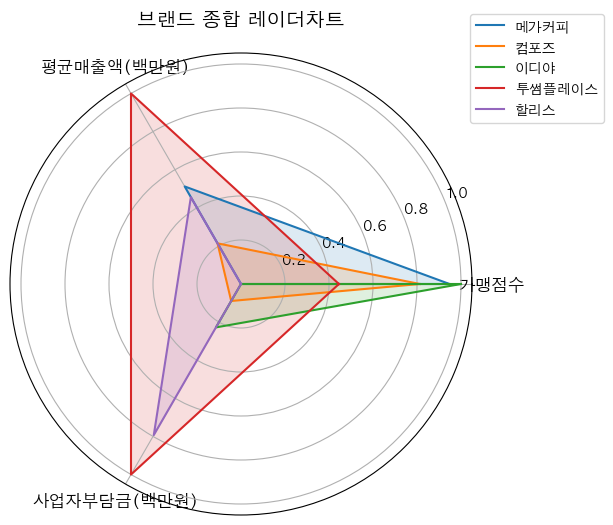

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎßå ÏÑ†ÌÉù (ÌèâÍ∑†Îß§Ï∂úÏï° Ï†úÏô∏ÌïòÍ≥† Ï∂îÍ∞Ä)
selected_cols = ['Í∞ÄÎßπÏ†êÏàò', 'ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', 'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)']

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
radar_df = df[['Î∏åÎûúÎìúÎ™Ö'] + selected_cols]
radar_df = radar_df.set_index('Î∏åÎûúÎìúÎ™Ö')

# ÌëúÏ§ÄÌôî (min-max scaling)
normalized = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# Î†àÏù¥ÎçîÏ∞®Ìä∏ Í∏∞Î≥∏ ÏÑ∏ÌåÖ
labels = normalized.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))

# Î∏åÎûúÎìúÎ≥ÑÎ°ú Í∑∏Î¶¨Í∏∞
for brand in normalized.index:
    values = normalized.loc[brand].tolist()
    values += values[:1]  # ÌèêÍ≥°ÏÑ†
    plt.polar(angles, values, label=brand)
    plt.fill(angles, values, alpha=0.15)

plt.xticks(angles[:-1], labels, fontsize=12)
plt.title('Î∏åÎûúÎìú Ï¢ÖÌï© Î†àÏù¥ÎçîÏ∞®Ìä∏', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [14]:
import pandas as pd
from collections import Counter

# ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏
positive_keywords = ["ÎßõÏûà", "ÏπúÏ†à", "Ï¢ã", "ÍπîÎÅî", "Ï∂îÏ≤ú", "Ï†ÄÎ†¥", "ÌõåÎ•≠", "Îπ†Î•¥", "Í∞êÏÇ¨", "ÎÑì"]
negative_keywords = ['ÎπÑÌò∏', 'Íµ≥Ïù¥', 'Î∂àÏæå', 'Ïã§Îßù', 'ÏóÜ', 'Î≥ÑÎ°ú', 'Ïù¥ÏÉÅ', 'ÎçîÏõåÏöî', 'Î∞çÎ∞ç', 'Îç•', 'Î∂àÏπúÏ†à', 'Î≥µÏû°', 'Ï¢Å', 'Ïç©ÏùÄ', 'ÎÖ∏Îãµ', ';', 'ÏïÑÏâΩ', 'Ïûë', 'Î™®Î•¥', 'Î∂ÄÏ°±', 'Îß§ÎÑà', 'Ïò§Îûò', 'Í±∞Ï†à', 'Ìå®Ïä§', 'ÍµêÏ≤¥', 'Î∂àÌé∏', 'Ïù¥Î¨ºÏßà', 'ÏûòÎ™ª', 'ÎπÑÏã∏', 'ÎäêÎ¶¨', 'Í∑ÄÏ∞Æ', 'ÏãúÍ∏â', 'Ï†ÅÎã§', 'ÎÇòÎπ†', 'ÏµúÏïÖ', 'Ïñ¥Ïù¥','ÏãúÏõêÏ∞ÆÏùå']

# Í∞êÏÑ± Î∂ÑÏÑù Ìï®Ïàò
def analyze_sentiment_korean(text):
    pos = sum(1 for word in positive_keywords if word in text)
    neg = sum(1 for word in negative_keywords if word in text)

    if pos > neg:
        return "positive"
    elif neg > pos:
        return "negative"
    else:
        return "neutral"

# Î∏åÎûúÎìúÎ≥Ñ ÌååÏùº Í≤ΩÎ°ú
brand_files = {
    "Î©îÍ∞ÄÏª§Ìîº": {
        "Î©îÍ∞ÄÏª§Ìîº_Í∞ïÎÇ®Î°úÎç∞Ïò§Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·ÑÜ·Ö¶·ÑÄ·Ö°·Ñè·Ö•·Ñë·Öµ_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·ÑÖ·Ö©·ÑÉ·Ö¶·Ñã·Ö©·Ñå·Ö•·Ü∑.xlsx",
        "Î©îÍ∞ÄÏª§Ìîº_Í∞ïÎÇ®Ï§ëÏïôÏ†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·ÑÜ·Ö¶·ÑÄ·Ö°·Ñè·Ö•·Ñë·Öµ_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñå·ÖÆ·Üº·Ñã·Ö°·Üº·Ñå·Ö•·Ü∑.xlsx"
    },
    "Ïª¥Ìè¨Ï¶à": {
        "Ïª¥Ìè¨Ï¶à_Í∞ïÎÇ®Ïó≠ÏÇ¨Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñè·Ö•·Ü∑·Ñë·Ö©·Ñå·Ö≥_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñã·Öß·Ü®·Ñâ·Ö°·Ñå·Ö•·Ü∑.xlsx",
        "Ïª¥Ìè¨Ï¶à_Í∞ïÎÇ®Ïó≠ÏÑºÌä∏Îü¥Ïï†ÎπÑÎâ¥Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñè·Ö•·Ü∑·Ñë·Ö©·Ñå·Ö≥_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñã·Öß·Ü®·Ñâ·Ö¶·Ü´·Ñê·Ö≥·ÑÖ·Ö•·ÜØ·Ñã·Ö¢·Ñá·Öµ·ÑÇ·Ö≤·Ñå·Ö•·Ü∑.xlsx"
    },
    "Ïù¥ÎîîÏïº": {
        "Ïù¥ÎîîÏïºÏª§Ìîº_Ïã†ÎÖºÌòÑÏó≠Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñã·Öµ·ÑÉ·Öµ·Ñã·Ö£·Ñè·Ö•·Ñë·Öµ_·Ñâ·Öµ·Ü´·ÑÇ·Ö©·Ü´·Ñí·Öß·Ü´·Ñã·Öß·Ü®·Ñå·Ö•·Ü∑.xlsx",
        "Ïù¥ÎîîÏïºÏª§Ìîº_Ïó≠ÏÇºÏó≠Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñã·Öµ·ÑÉ·Öµ·Ñã·Ö£·Ñè·Ö•·Ñë·Öµ_·Ñã·Öß·Ü®·Ñâ·Ö°·Ü∑·Ñã·Öß·Ü®·Ñå·Ö•·Ü∑.xlsx",
        "Ïù¥ÎîîÏïºÏª§Ìîº_Ïó≠ÏÇºÌîåÎûòÌã∞ÎÑòÏ†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñã·Öµ·ÑÉ·Öµ·Ñã·Ö£·Ñè·Ö•·Ñë·Öµ_·Ñã·Öß·Ü®·Ñâ·Ö°·Ü∑·Ñë·Ö≥·ÜØ·ÑÖ·Ö¢·Ñê·Öµ·ÑÇ·Ö•·Ü∑·Ñå·Ö•·Ü∑.xlsx"
    },
    "Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§": {
        "Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§_Í∞ïÎÇ®KIÌÉÄÏõåÏ†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñê·ÖÆ·Ñä·Ö•·Ü∑·Ñë·Ö≥·ÜØ·ÑÖ·Ö¶·Ñã·Öµ·Ñâ·Ö≥_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑KI·Ñê·Ö°·Ñã·ÖØ·Ñå·Ö•·Ü∑.xlsx",
        "Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§_Í∞ïÎÇ®Ïó≠Ï§ëÏïôÏ†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñê·ÖÆ·Ñä·Ö•·Ü∑·Ñë·Ö≥·ÜØ·ÑÖ·Ö¶·Ñã·Öµ·Ñâ·Ö≥_·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñã·Öß·Ü®·Ñå·ÖÆ·Üº·Ñã·Ö°·Üº·Ñå·Ö•·Ü∑.xlsx"
    },
    "Ìï†Î¶¨Ïä§": {
        "Ìï†Î¶¨Ïä§_Í∞ïÎÇ®Ïó≠2": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñí·Ö°·ÜØ·ÑÖ·Öµ·Ñâ·Ö≥ ·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñã·Öß·Ü®2.xlsx",
        "Ìï†Î¶¨Ïä§_Í∞ïÎÇ®Ïó≠Ï†ê": r"/Users/hansujeong/Desktop/·Ñë·Ö°·Ñã·Öµ·Ñä·Ö•·Ü´·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö• ·Ñá·ÖÆ·Ü´·Ñâ·Ö•·Ü®_·Ñê·Öµ·Ü∑·Ñë·Ö≥·ÜØ/reivew/·Ñí·Ö°·ÜØ·ÑÖ·Öµ·Ñâ·Ö≥ ·ÑÄ·Ö°·Üº·ÑÇ·Ö°·Ü∑·Ñã·Öß·Ü®·Ñå·Ö•·Ü∑.xlsx"
    }
}

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
brand_results = {}

# Î∏åÎûúÎìú Îã®ÏúÑ Î∂ÑÏÑù
for brand, branches in brand_files.items():
    pos_count, neg_count = 0, 0
    all_pos_words, all_neg_words = [], []

    for file_path in branches.values():
        df_emotion = pd.read_excel(file_path, sheet_name="output")

        for _, row in df_emotion.iterrows():
            text = f"{str(row.get('content', ''))} {str(row.get('tag_text', ''))}"
            sentiment = analyze_sentiment_korean(text)

            if sentiment == "positive":
                pos_count += 1
                matched = [w for w in positive_keywords if w in text]
                all_pos_words.extend(matched)
            elif sentiment == "negative":
                neg_count += 1
                matched = [w for w in negative_keywords if w in text]
                all_neg_words.extend(matched)

    total = pos_count + neg_count
    pos_rate = round(pos_count / total * 100, 1) if total else 0
    neg_rate = round(neg_count / total * 100, 1) if total else 0

    brand_results[brand] = {
        "Í∏çÏ†ï ÎπÑÏú®(%)": pos_rate,
        "Î∂ÄÏ†ï ÎπÑÏú®(%)": neg_rate,
        "Í∏çÏ†ï ÌÇ§ÏõåÎìú ÏÉÅÏúÑ 5Í∞ú": [w for w, _ in Counter(all_pos_words).most_common(5)],
        "Î∂ÄÏ†ï ÌÇ§ÏõåÎìú ÏÉÅÏúÑ 5Í∞ú": [w for w, _ in Counter(all_neg_words).most_common(5)]
    }

# Í≤∞Í≥º Ï∂úÎ†•
for brand, res in brand_results.items():
    print(f"\nüè¢ {brand}")
    print(f" - Í∏çÏ†ï ÎπÑÏú®: {res['Í∏çÏ†ï ÎπÑÏú®(%)']}%")
    print(f" - Î∂ÄÏ†ï ÎπÑÏú®: {res['Î∂ÄÏ†ï ÎπÑÏú®(%)']}%")
    print(f" - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: {res['Í∏çÏ†ï ÌÇ§ÏõåÎìú ÏÉÅÏúÑ 5Í∞ú']}")
    print(f" - ÎåÄÌëú Î∂ÄÏ†ï ÌÇ§ÏõåÎìú: {res['Î∂ÄÏ†ï ÌÇ§ÏõåÎìú ÏÉÅÏúÑ 5Í∞ú']}")


üè¢ Î©îÍ∞ÄÏª§Ìîº
 - Í∏çÏ†ï ÎπÑÏú®: 97.9%
 - Î∂ÄÏ†ï ÎπÑÏú®: 2.1%
 - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: ['ÎßõÏûà', 'Ï¢ã', 'ÏπúÏ†à', 'Îπ†Î•¥', 'Ï†ÄÎ†¥']
 - ÎåÄÌëú Î∂ÄÏ†ï ÌÇ§ÏõåÎìú: ['ÏóÜ', ';', 'Î∂àÏæå', 'Ïã§Îßù', 'Ï¢Å']

üè¢ Ïª¥Ìè¨Ï¶à
 - Í∏çÏ†ï ÎπÑÏú®: 95.9%
 - Î∂ÄÏ†ï ÎπÑÏú®: 4.1%
 - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: ['ÎßõÏûà', 'Ï¢ã', 'ÏπúÏ†à', 'Îπ†Î•¥', 'Ï†ÄÎ†¥']
 - ÎåÄÌëú Î∂ÄÏ†ï ÌÇ§ÏõåÎìú: ['ÏóÜ', 'Î∂àÏπúÏ†à', 'Î™®Î•¥', 'ÏµúÏïÖ', 'Íµ≥Ïù¥']

üè¢ Ïù¥ÎîîÏïº
 - Í∏çÏ†ï ÎπÑÏú®: 97.5%
 - Î∂ÄÏ†ï ÎπÑÏú®: 2.5%
 - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: ['ÎßõÏûà', 'Ï¢ã', 'ÏπúÏ†à', 'ÎÑì', 'Îπ†Î•¥']
 - ÎåÄÌëú Î∂ÄÏ†ï ÌÇ§ÏõåÎìú: ['ÏóÜ', 'Ïã§Îßù', ';', 'Ïò§Îûò', 'Î≥ÑÎ°ú']

üè¢ Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§
 - Í∏çÏ†ï ÎπÑÏú®: 97.3%
 - Î∂ÄÏ†ï ÎπÑÏú®: 2.7%
 - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: ['ÎßõÏûà', 'Ï¢ã', 'ÎÑì', 'ÏπúÏ†à', 'ÍπîÎÅî']
 - ÎåÄÌëú Î∂ÄÏ†ï ÌÇ§ÏõåÎìú: ['ÏóÜ', 'Î∂àÏπúÏ†à', 'Î∂àÏæå', 'Ï¢Å', 'Îß§ÎÑà']

üè¢ Ìï†Î¶¨Ïä§
 - Í∏çÏ†ï ÎπÑÏú®: 97.7%
 - Î∂ÄÏ†ï ÎπÑÏú®: 2.3%
 - ÎåÄÌëú Í∏çÏ†ï ÌÇ§ÏõåÎìú: ['ÎßõÏûà', 'Ï¢ã', 'ÎÑì', 'ÏπúÏ†à', 'ÍπîÎÅî']
 - ÎåÄÌë

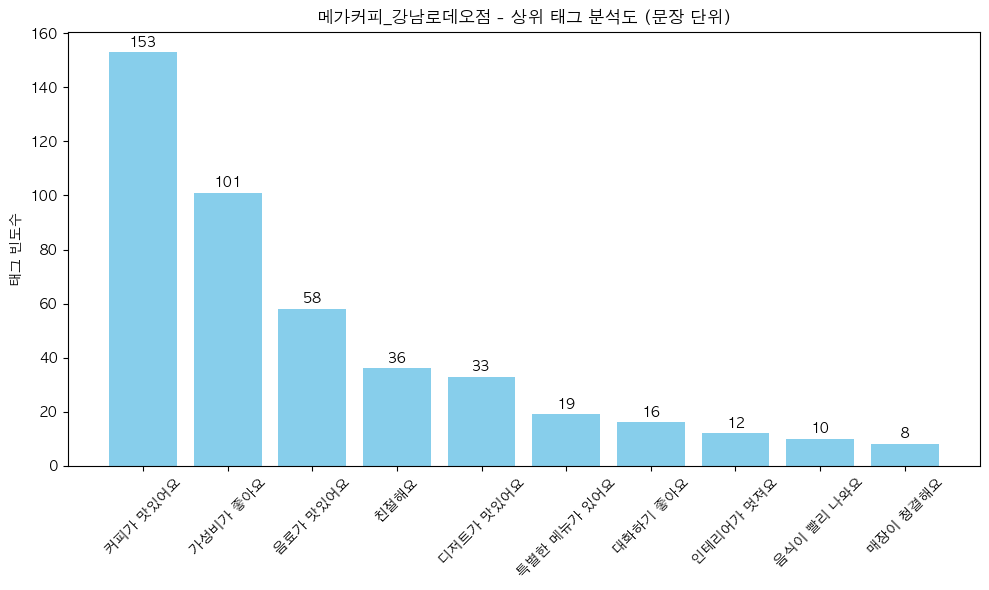

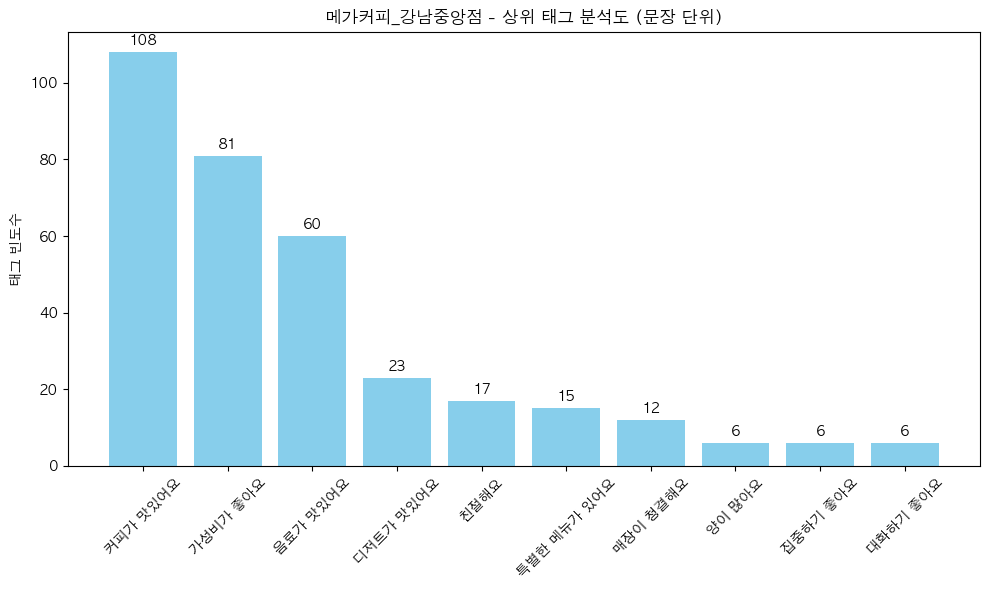

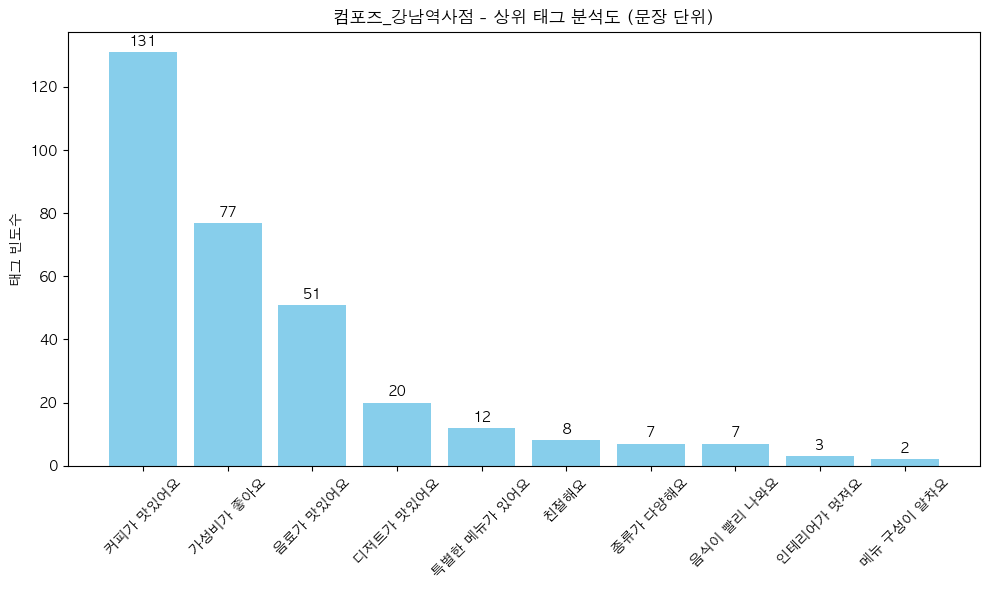

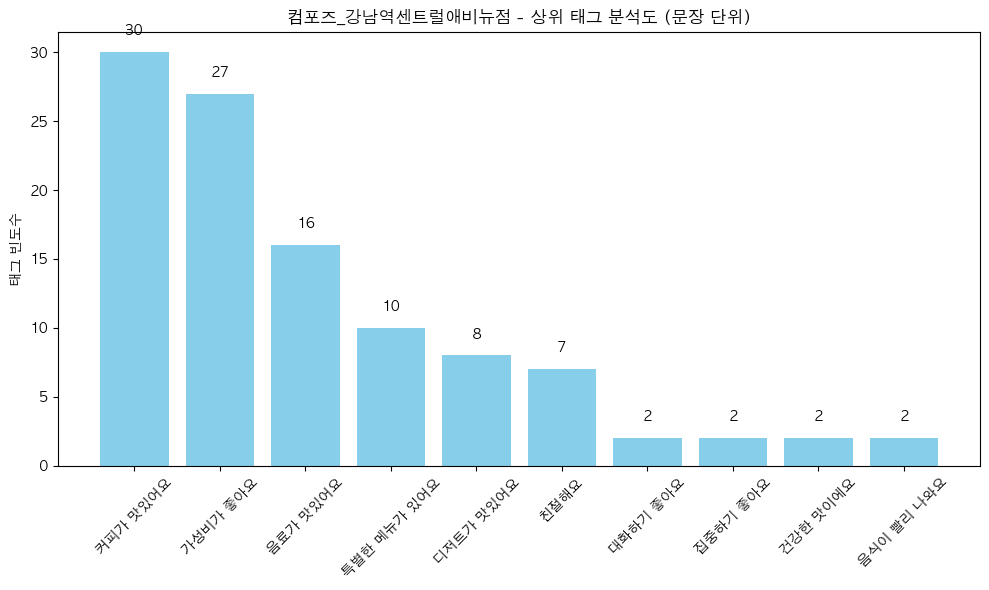

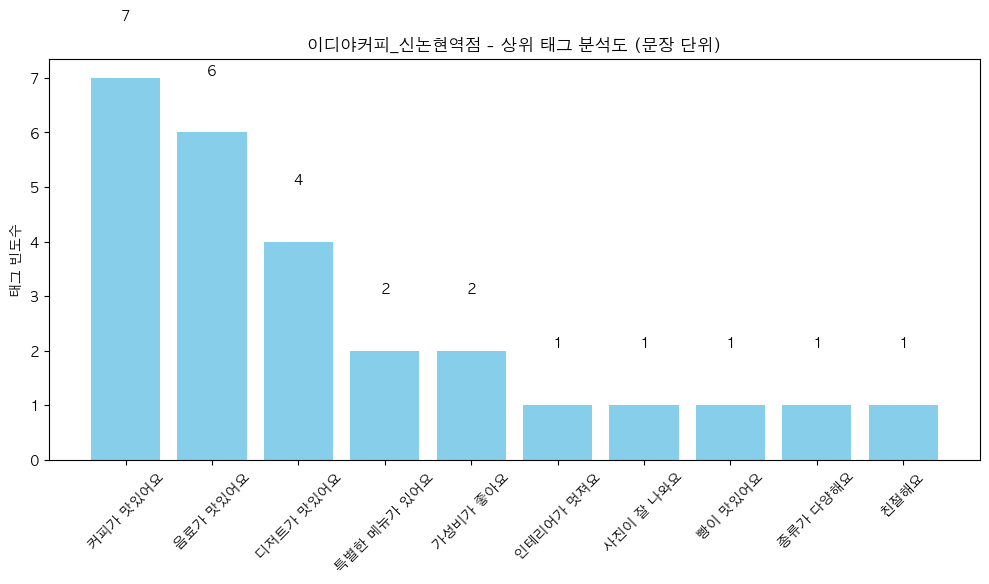

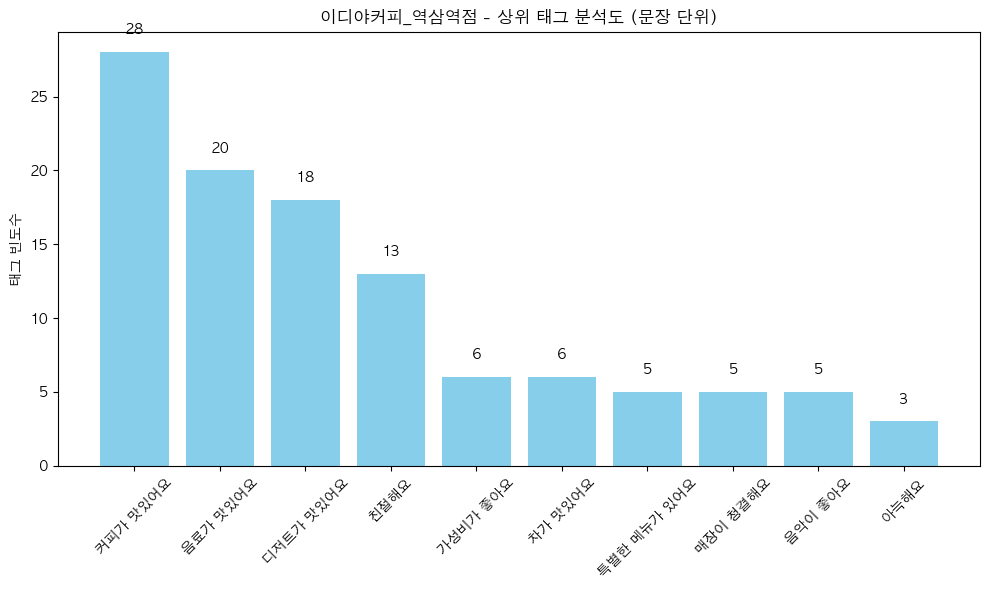

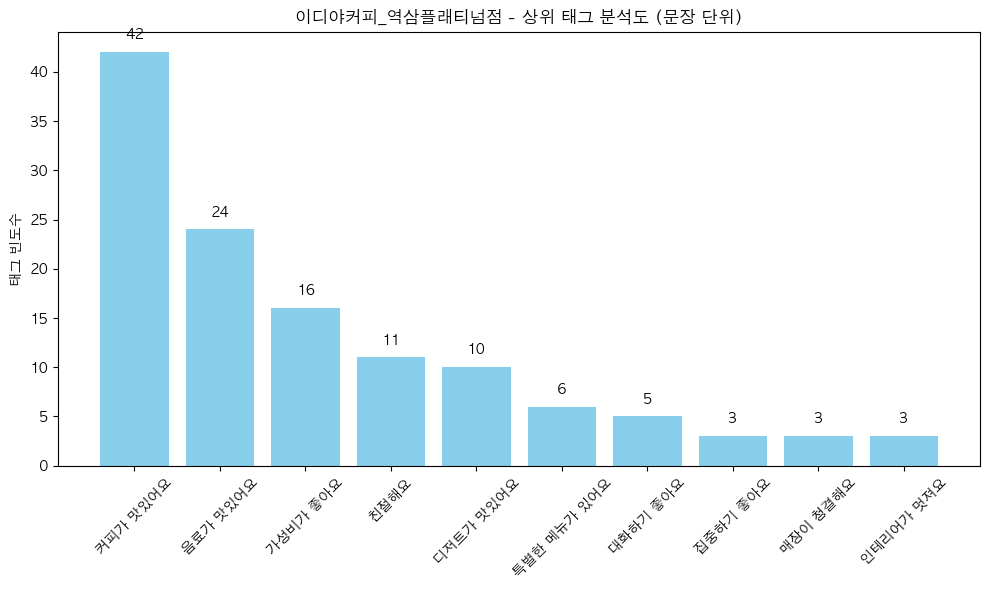

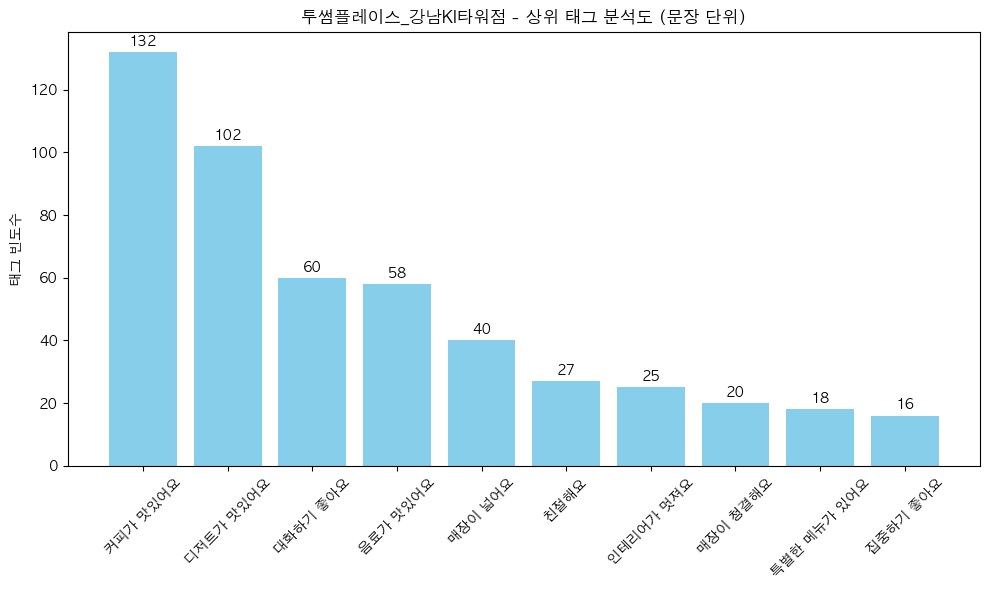

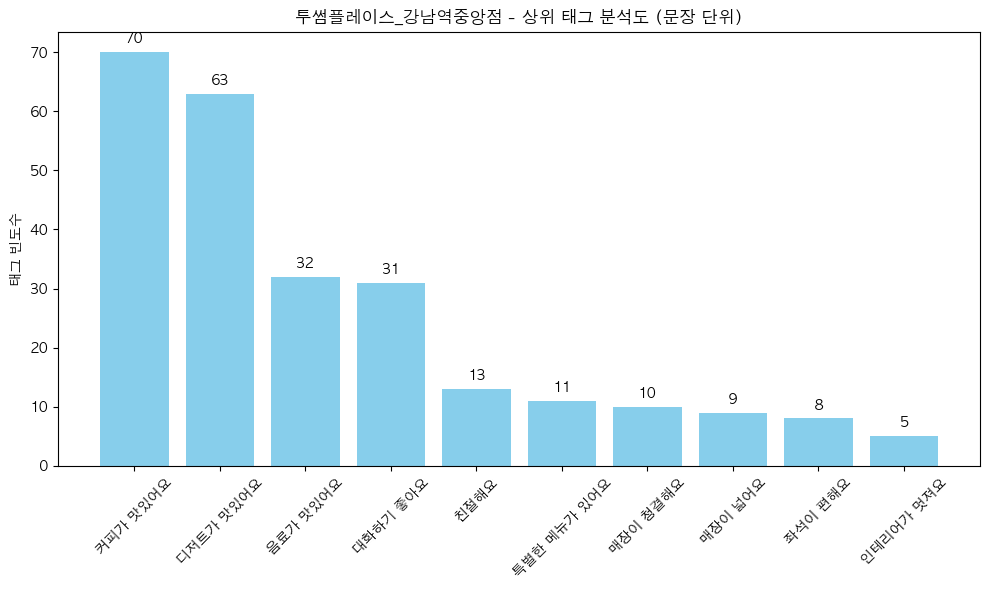

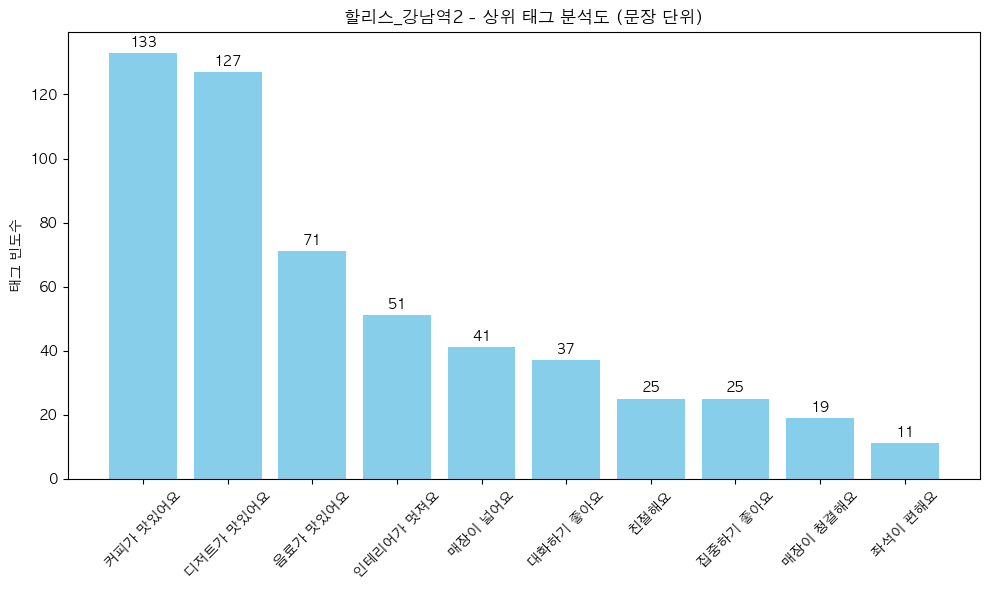

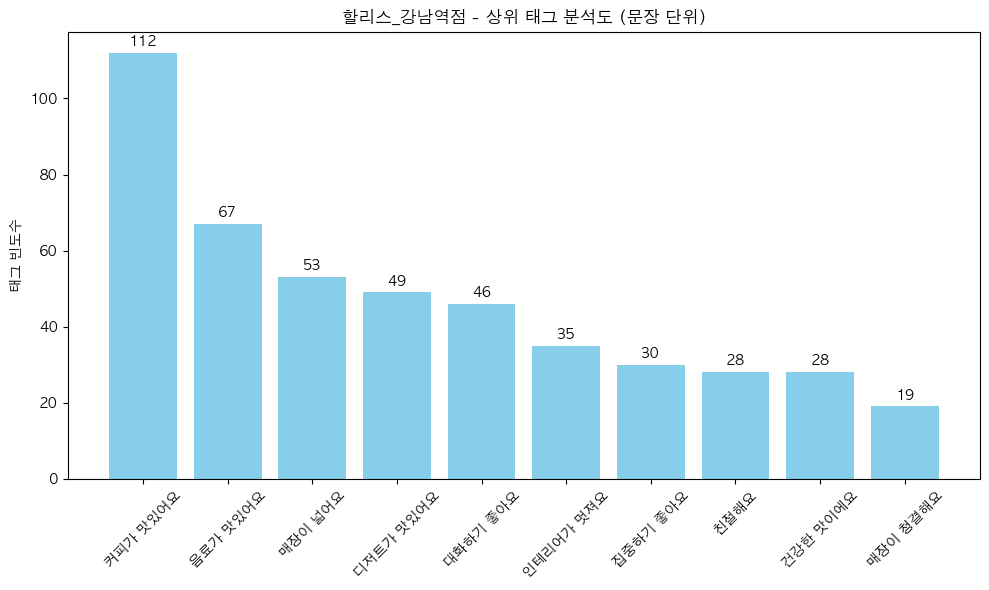

In [17]:
# Î¨∏Ïû• Îã®ÏúÑ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
for brand, branches in brand_files.items():
    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        all_tags = []
        for tags in df_tag["tag_text"].dropna():
            # ÏâºÌëúÎ°ú Î¨∏Ïû• Îã®ÏúÑ Î∂ÑÎ¶¨ÌïòÍ≥† ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            all_tags.extend(sentence_list)

            tag_counts = Counter(all_tags).most_common(10)

        if not tag_counts:
            print(f"‚ö†Ô∏è {branch_name}Ïóê ÌÉúÍ∑∏ ÏóÜÏùå")
            continue

        # ÎπàÎèÑÏàò ÏÉÅÏúÑ 10Í∞ú ÌÉúÍ∑∏ Ï∂îÏ∂ú
        tag_counts = Counter(all_tags).most_common(10)
        tags, counts = zip(*tag_counts)
        
        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(10, 6))
        bars = plt.bar(tags, counts, color='skyblue')
        plt.title(f"{branch_name} - ÏÉÅÏúÑ ÌÉúÍ∑∏ Î∂ÑÏÑùÎèÑ (Î¨∏Ïû• Îã®ÏúÑ)")
        plt.ylabel("ÌÉúÍ∑∏ ÎπàÎèÑÏàò")
        plt.xticks(rotation=45)

        # ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}",
                     ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()


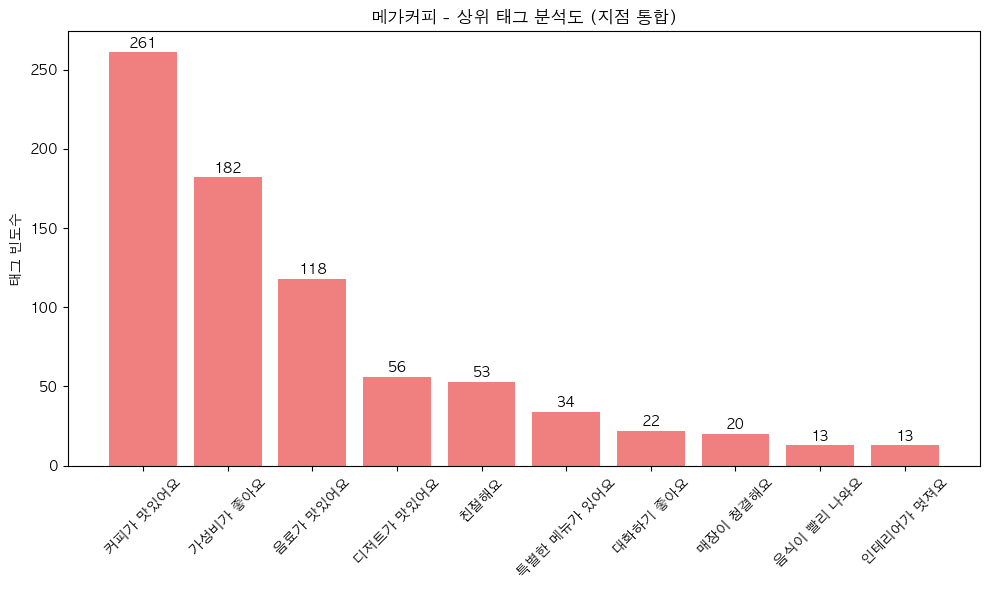

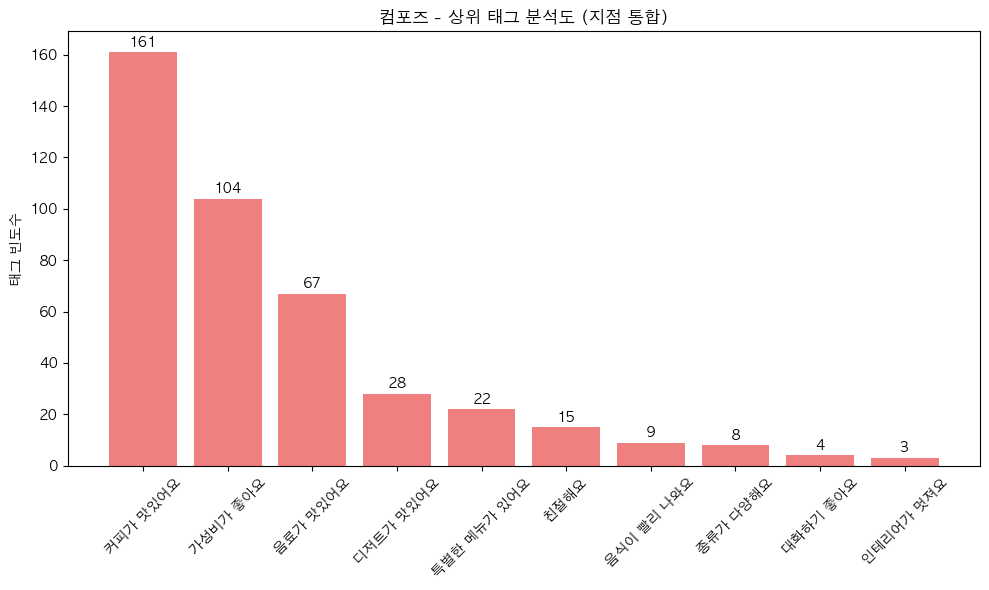

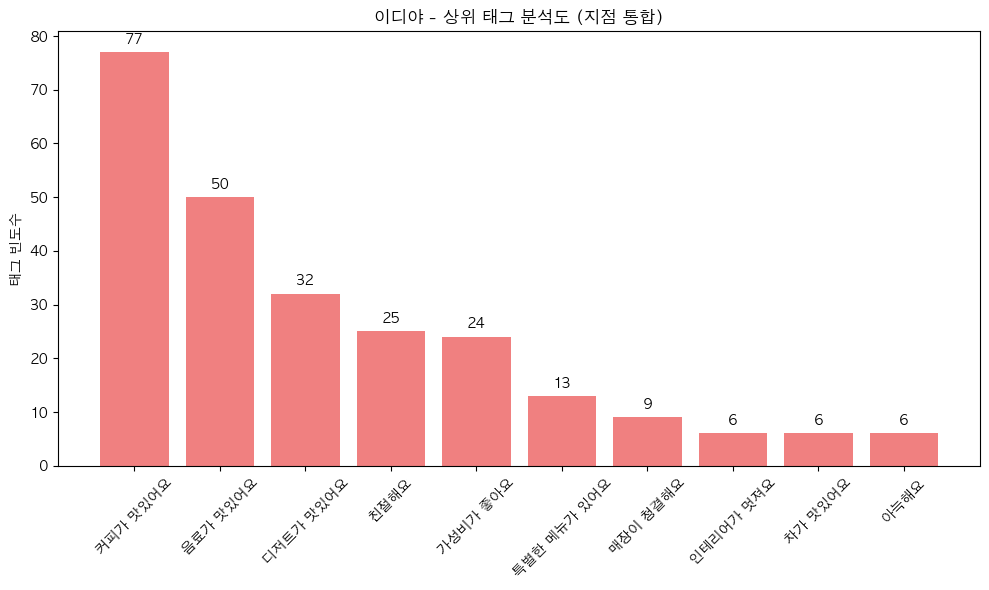

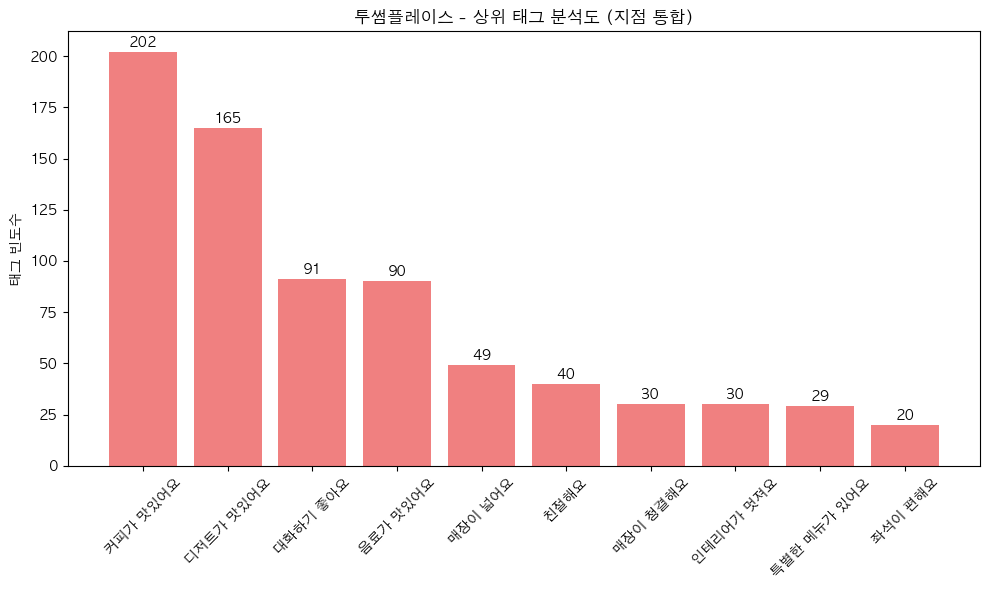

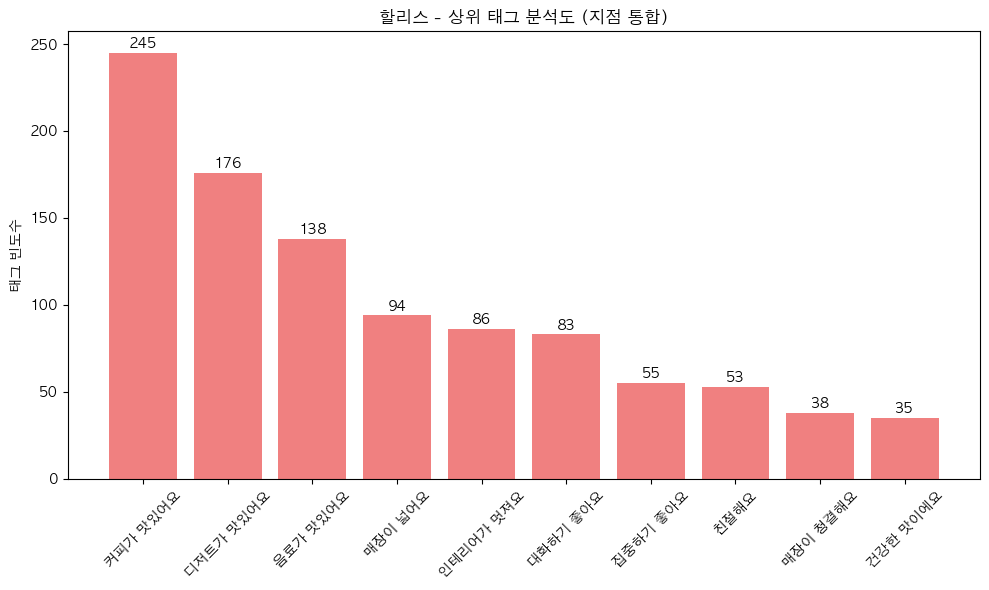

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd


# Î∏åÎûúÎìúÎ≥Ñ ÌÉúÍ∑∏ ÏàòÏßë Î∞è ÏãúÍ∞ÅÌôî
for brand, branches in brand_files.items():
    brand_tags = []

    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        for tags in df_tag["tag_text"].dropna():
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            brand_tags.extend(sentence_list)

    if not brand_tags:
        print(f"‚ö†Ô∏è {brand}Ïóê ÌÉúÍ∑∏ ÏóÜÏùå")
        continue

    tag_counts = Counter(brand_tags).most_common(10)
    tags, counts = zip(*tag_counts)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    bars = plt.bar(tags, counts, color='lightcoral')
    plt.title(f"{brand} - ÏÉÅÏúÑ ÌÉúÍ∑∏ Î∂ÑÏÑùÎèÑ (ÏßÄÏ†ê ÌÜµÌï©)")
    plt.ylabel("ÌÉúÍ∑∏ ÎπàÎèÑÏàò")
    plt.xticks(rotation=45)

    # ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}",
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

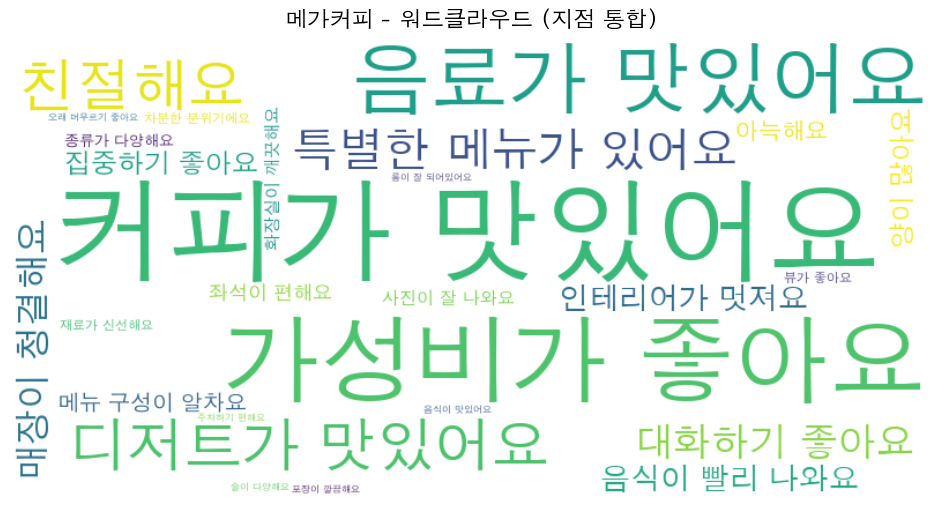

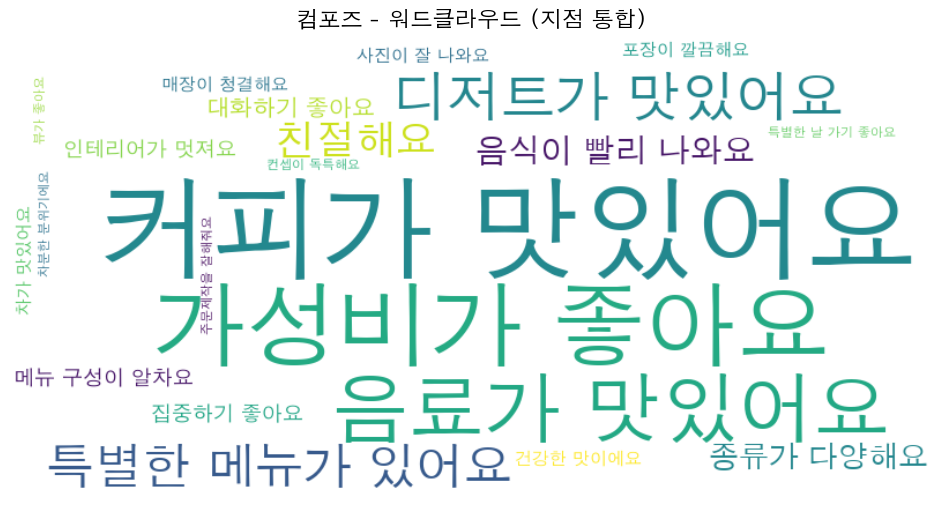

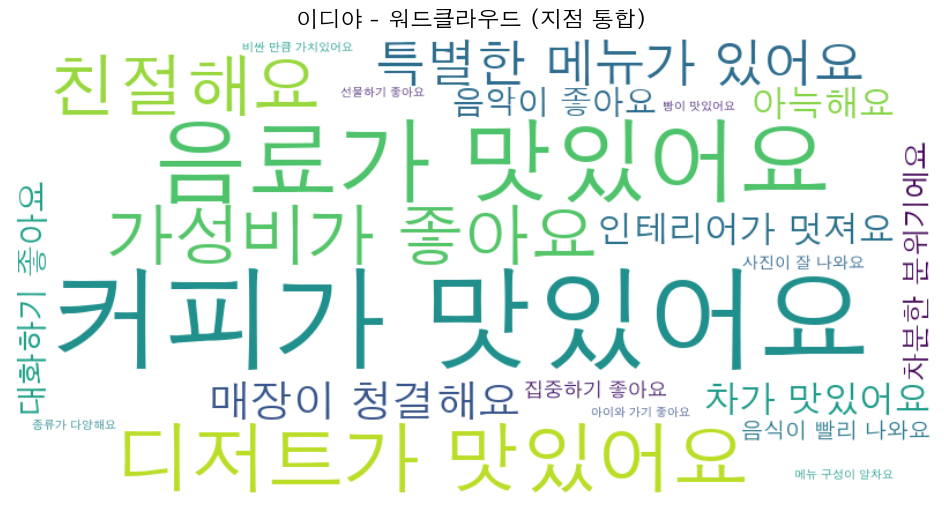

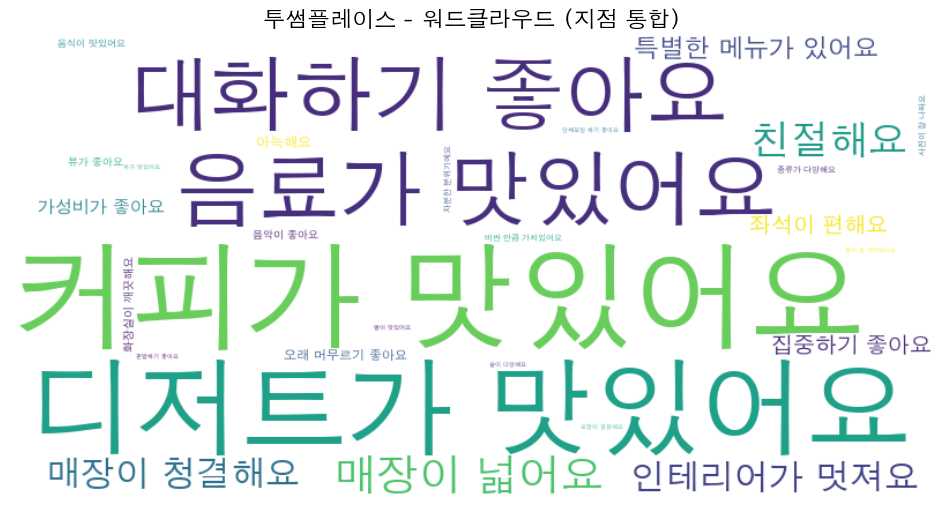

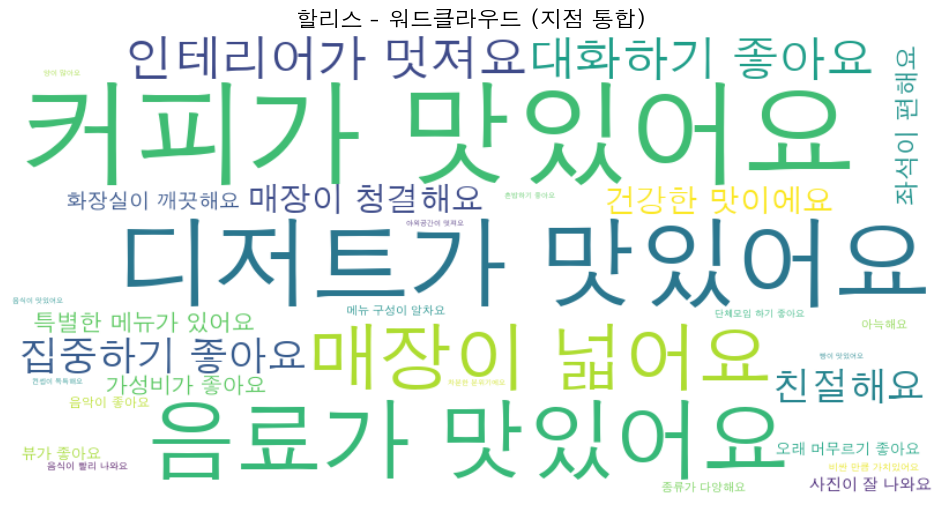

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

for brand, branches in brand_files.items():
    brand_tags = []

    for branch_name, file_path in branches.items():
        df_tag = pd.read_excel(file_path, sheet_name="output")

        for tags in df_tag["tag_text"].dropna():
            sentence_list = [s.strip() for s in str(tags).split(',') if s.strip()]
            brand_tags.extend(sentence_list)

    if not brand_tags:
        print(f"‚ö†Ô∏è {brand}Ïóê ÌÉúÍ∑∏ ÏóÜÏùå")
        continue

    tag_counts = Counter(brand_tags)

    # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
    wordcloud = WordCloud(
        font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf', 
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate_from_frequencies(tag_counts)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{brand} - ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú (ÏßÄÏ†ê ÌÜµÌï©)", fontsize=16)
    plt.show()


In [ ]:
data = []
for brand, stats in brand_results.items():
    data.append({
        'Î∏åÎûúÎìúÎ™Ö': brand,
        'Í∏çÏ†ïÎπÑÏú®(%)': stats['Í∏çÏ†ï ÎπÑÏú®(%)'],
        'Î∂ÄÏ†ïÎπÑÏú®(%)': stats['Î∂ÄÏ†ï ÎπÑÏú®(%)']
    })
df_sentiment = pd.DataFrame(data)

df = df.merge(df_sentiment, on='Î∏åÎûúÎìúÎ™Ö')

df['Îß§Ïö∞Ïö∞ÏàòÎπÑÏú®(%)'] = np.where(
    df['Í∞ÄÎßπÏ†êÏàò'] != 0,
    (df['ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò'] / df['Í∞ÄÎßπÏ†êÏàò'] * 100).round(1),
    np.nan
)
df.head()

Î∏åÎûúÎìúÎ™Ö    Í∞ÄÎßπÏ†êÏàò  ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)  \
0    Î©îÍ∞ÄÏª§Ìîº  2681.0     362.621         20.908       74.226           1.540   
1     Ïª¥Ìè¨Ï¶à  2360.0     265.013         26.002       95.232           1.600   
2     Ïù¥ÎîîÏïº  2805.0     195.287          6.447      127.890           2.090   
3  Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§  1484.0     522.117          8.949      309.800           2.187   
4     Ìï†Î¶¨Ïä§   424.0     344.268          5.849      261.000           2.000   

   ÌåîÎ°úÏõå(ÎßåÎ™Ö)  ÏúÑÏÉùÎì±Í∏âÎß§Ïö∞Ïö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏö∞ÏàòÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¢ãÏùåÍ∞úÏàò  ÏúÑÏÉùÎì±Í∏âÏ¥ùÍ∞úÏàò  Í∏çÏ†ïÎπÑÏú®(%)  Î∂ÄÏ†ïÎπÑÏú®(%)  \
0      4.7          82        13         2       97     97.9      2.1   
1     12.3         136        20         1      157     95.9      4.1   
2     21.4        1716       145        26     1887     97.5      2.5   
3     32.7         862        12         2      876     97.3      2.7   
4      6.5         318         3         1      322     97.7      2.3   

   Îß§Ïö∞Ïö∞ÏàòÎπÑÏú®(%)  
0        3.1  
1        5.8  
2       61.2  
3       58.1  
4       75.0

                    Í∞ÄÎßπÏ†êÏàò  ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)  ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)  \
Í∞ÄÎßπÏ†êÏàò            1.000000   -0.468360       0.497627    -0.811494   
ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)     -0.468360    1.000000      -0.134621     0.685719   
Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)   0.497627   -0.134621       1.000000    -0.691034   
ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)    -0.811494    0.685719      -0.691034     1.000000   
Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê) -0.434193    0.272458      -0.904176     0.794302   
ÌåîÎ°úÏõå(ÎßåÎ™Ö)         0.033622    0.392592      -0.399707     0.534464   
Îß§Ïö∞Ïö∞ÏàòÎπÑÏú®(%)      -0.630896    0.127984      -0.967493     0.769528   
Í∏çÏ†ïÎπÑÏú®(%)        -0.181753    0.233655      -0.598829     0.227582   

                Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)   ÌåîÎ°úÏõå(ÎßåÎ™Ö)  Îß§Ïö∞Ïö∞ÏàòÎπÑÏú®(%)   Í∏çÏ†ïÎπÑÏú®(%)  
Í∞ÄÎßπÏ†êÏàò                 -0.434193  0.033622  -0.630896 -0.181753  
ÌèâÍ∑†Îß§Ï∂úÏï°

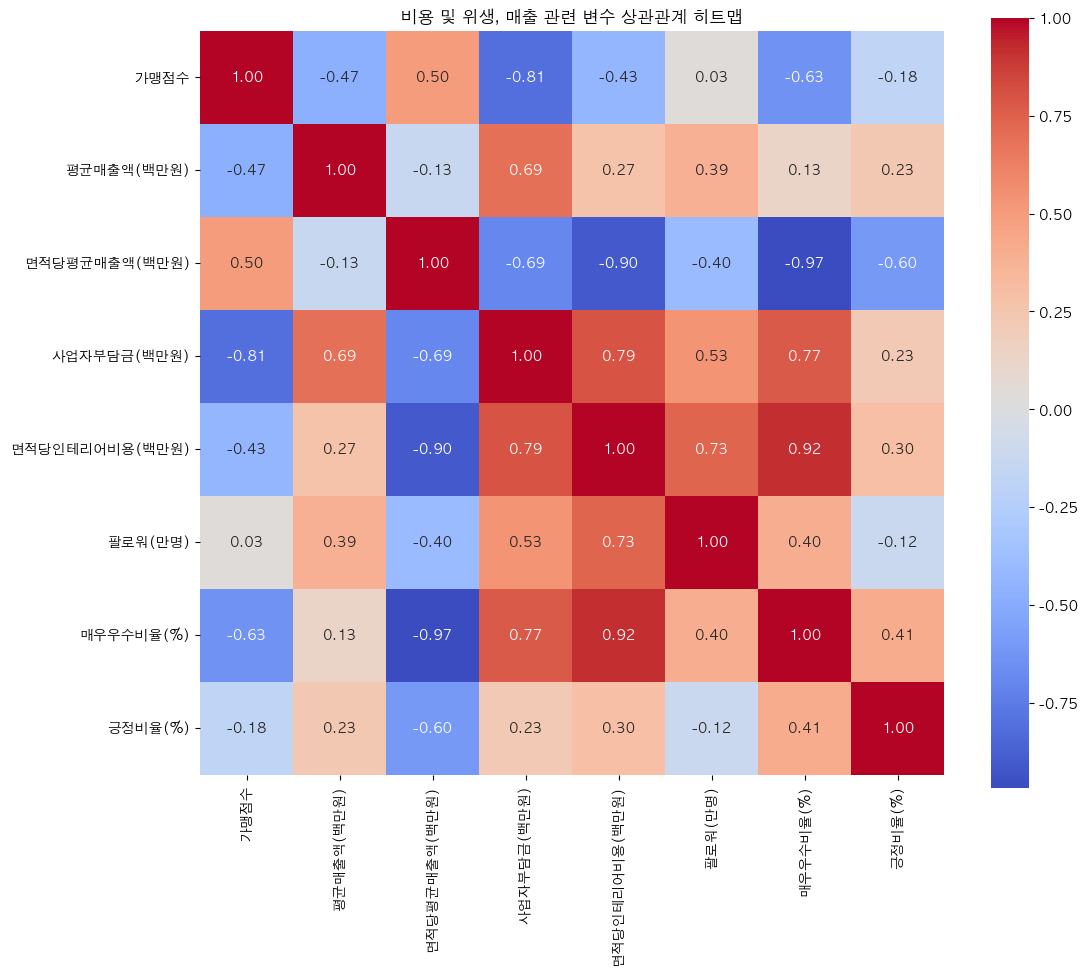

In [ ]:
analysis_cols = ['Í∞ÄÎßπÏ†êÏàò', 'ÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', 'Î©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°(Î∞±ÎßåÏõê)', 'ÏÇ¨ÏóÖÏûêÎ∂ÄÎã¥Í∏à(Î∞±ÎßåÏõê)',
       'Î©¥Ï†ÅÎãπÏù∏ÌÖåÎ¶¨Ïñ¥ÎπÑÏö©(Î∞±ÎßåÏõê)', 'ÌåîÎ°úÏõå(ÎßåÎ™Ö)', 'Îß§Ïö∞Ïö∞ÏàòÎπÑÏú®(%)', 'Í∏çÏ†ïÎπÑÏú®(%)']

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
analysis_df = df[analysis_cols].dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù
correlation_matrix = analysis_df.corr()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
print(correlation_matrix)

# ÏãúÍ∞ÅÌôî: ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("ÎπÑÏö© Î∞è ÏúÑÏÉù, Îß§Ï∂ú Í¥ÄÎ†® Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()